In [26]:
import mnist_loader
import numpy as np
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

import tensorflow as tf
from tensorflow.keras import layers, models, utils

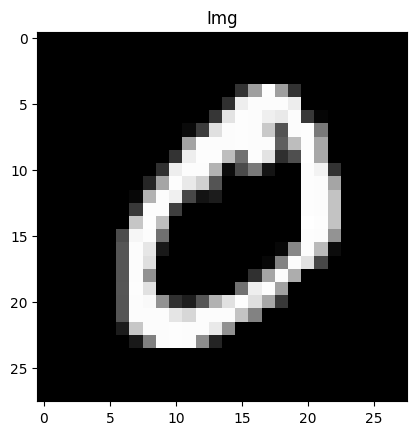

0


In [12]:
import matplotlib.pyplot as plt

img = 1
pixel_array_2d = training_data[img][0].reshape((28, 28))

# Display the image using Matplotlib
plt.imshow(pixel_array_2d, cmap='gray', vmin=0, vmax=1)
plt.title("Img")
plt.show()
print(list(training_data[img][1]).index(1))

In [20]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                123936    
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                      

In [15]:
x_train, y_train = zip(*training_data)
# y_train = [list(x).index(1) for x in y_train]
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the flattened pixel values to the original image shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [16]:
x_val, y_val = zip(*validation_data)
x_val, y_val = np.array(x_val), np.array(utils.to_categorical(y_val))

# Reshape the flattened pixel values to the original image shape
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [22]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2010 - accuracy: 0.9401 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0679 - val_accuracy: 0.9807
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0567 - val_accuracy: 0.9853
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0477 - val_accuracy: 0.9873
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0484 - val_accuracy: 0.9864


In [39]:
x_test, y_test = zip(*test_data)
x_test = np.array(x_test)

# Reshape the flattened pixel values to the original image shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [40]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [41]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predicted_labels)
report = classification_report(y_test, predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9861
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       1.00      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
incorrect_indices = np.where(y_test != predicted_labels)[0]

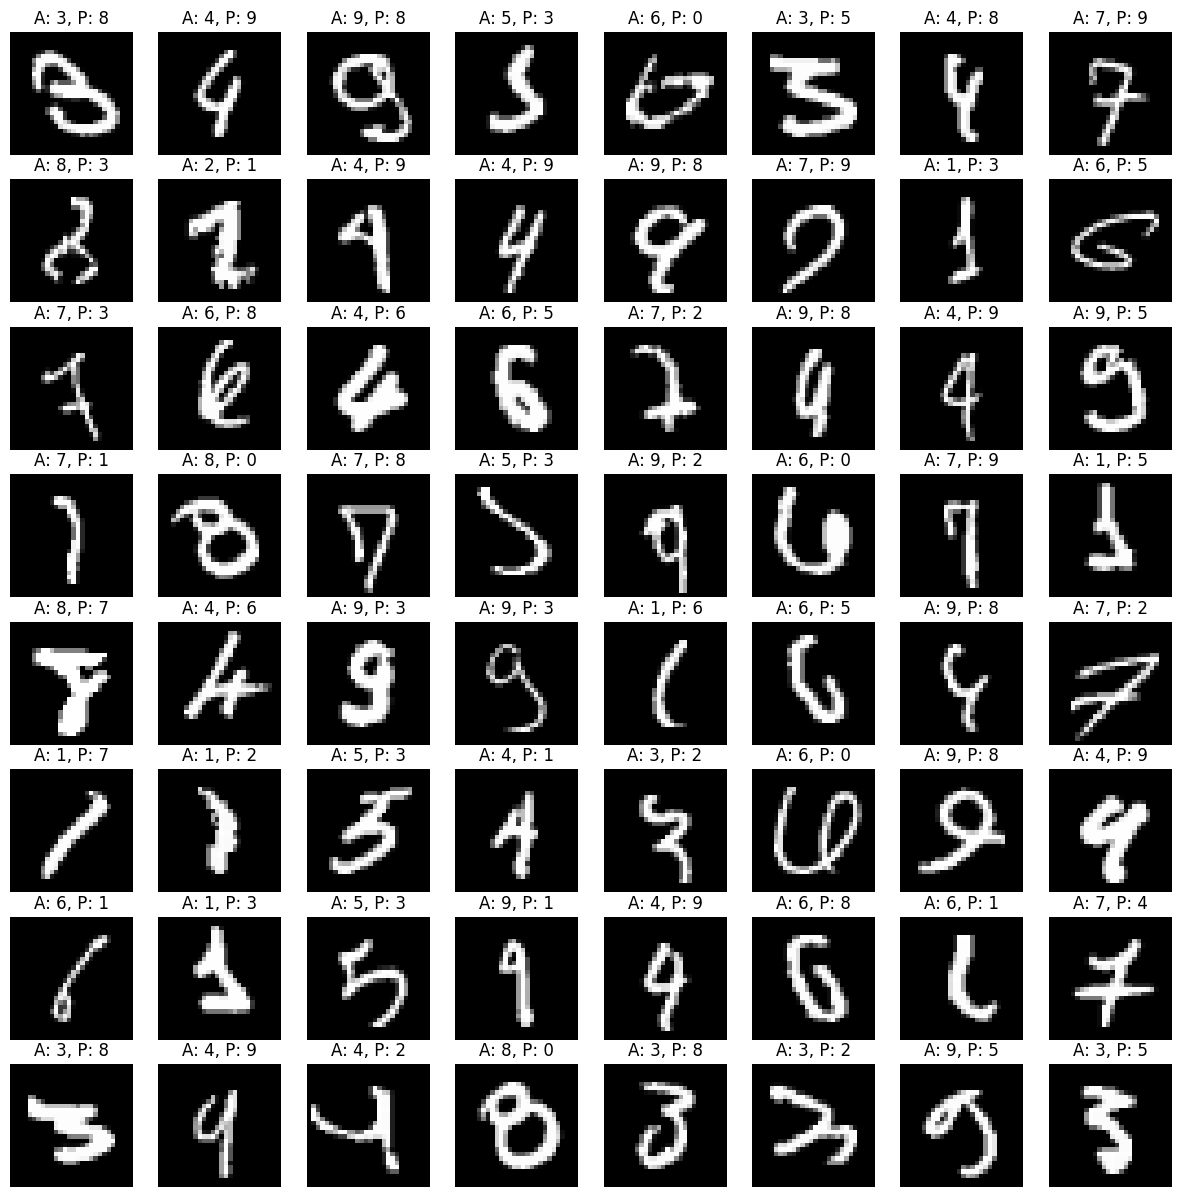

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure and axis for each image
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = axes.flatten() 
# Iterate through images and plot them
for i, inc_index in enumerate(incorrect_indices[0:64]):
    # Read the image using matplotlib's imread
    
    axes[i].imshow(x_test[inc_index], cmap='gray', vmin=0, vmax=1)
    axes[i].set_title(f'A: {y_test[inc_index]}, P: {predicted_labels[inc_index]}')
    axes[i].axis('off')  # Turn off axis labels

# Show the plot
plt.show()

In [89]:
scores = []
def give_score(model, batch_size = 16, epochs = 5):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=0)
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(y_test, predicted_labels)
    return model, accuracy

In [90]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

scores.append(give_score(model))

313/313 [==============================] - 1s 3ms/step


In [92]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes for classification
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

scores.append(give_score(model))